In [2]:
%matplotlib inline
import numpy as np
import netCDF4 as nc
import sys
import os.path
import pylab as py
import matplotlib.cm as cm
import errno
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    reverse = []
    k = []

    for key in cmap._segmentdata:
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:
            data.append((1-t[0],t[2],t[1]))
        reverse.append(sorted(data))

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL)
    return my_cmap_r

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

filename="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_realqflux6.nc"
#filename="/project/tas1/pragallva/Fall_quarter_2017/Isca/input/ocean_qflux.nc"
print filename, 'ok'
data=nc.Dataset(filename,'r+')
# print data.variables[dirc[1]]
print data.variables.keys()

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise


/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_realqflux6.nc ok
[u'lon', u'lonb', u'lat', u'latb', u'time', u'nv', u'pfull', u'phalf', u'scalar_axis', u'ps', u'pres_full', u'pres_half', u'bk', u'pk', u'ucomp', u'vcomp', u'temp', u'sphum', u'omega', u'zsurf', u'height', u'height_half', u'EKE', u'vor', u'div', u'flux_sw', u'flux_lw', u'rrtm_albedo', u'olr', u'coszen', u'toa_sw', u'flux_oceanq', u't_surf', u'flux_lhe', u'flux_t', u'average_T1', u'average_T2', u'average_DT', u'time_bounds']


In [25]:
lat=data.variables['lat']
lon=data.variables['lon']

In [26]:
SST=data.variables['t_surf'][:].reshape((12,30,4,len(lat),len(lon)))

In [27]:
SST=SST.mean(axis=1).mean(axis=1)

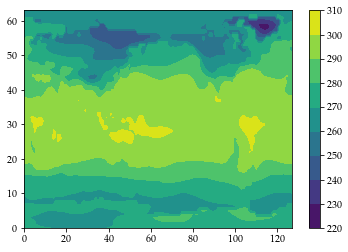

In [29]:
py.contourf(SST[11,:,:]); py.colorbar()

# Check SST fields of different simulations

In [1]:
%matplotlib inline
import numpy as np
import netCDF4 as nc
import sys
import os.path
import pylab as py
import matplotlib.cm as cm
import errno
from reverse_cmap import rcmap

BuRd = rcmap(cm.RdBu)

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

filename1="/project/tas1/pragallva/Fall_quarter_2017/sst_clim_amip.nc" # øbservation
filename2="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_realqflux6.nc" # Ruth's experiment
filename3="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_tracmipqflux.nc"
filename4="/project2/tas1/pragallva/Fall_quarter_2017/exp_data/land/land_zeroqflux.nc"


data1=nc.Dataset(filename1,'r')
data2=nc.Dataset(filename2,'r')
data3=nc.Dataset(filename3,'r')
data4=nc.Dataset(filename4,'r')
# print data.variables[dirc[1]]
print data4.variables.keys()
print data1.variables.keys()


def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise


[u'lon', u'lonb', u'lat', u'latb', u'time', u'nv', u'pfull', u'phalf', u'scalar_axis', u'ps', u'pres_full', u'pres_half', u'bk', u'pk', u'ucomp', u'vcomp', u'temp', u'sphum', u'omega', u'zsurf', u'height', u'height_half', u'EKE', u'vor', u'div', u'flux_sw', u'flux_lw', u'rrtm_albedo', u'olr', u'coszen', u'toa_sw', u'flux_oceanq', u't_surf', u'flux_lhe', u'flux_t', u'average_T1', u'average_T2', u'average_DT', u'time_bounds']
[u'lat', u'lon', u'latb', u'lonb', u'time', u'sst_clim_amip']


In [2]:
from reverse_cmap import rcmap
my_cmap_r  = rcmap(cm.RdBu)

In [3]:
def res(x):
    y=x.reshape((12,x.shape[0]/12,x.shape[1],x.shape[2]))
    return y

In [5]:
tsurf_obs=data1.variables['sst_clim_amip'][:]

In [7]:
tsurf_obs.shape

(12, 180, 360)

In [8]:
tsurf_ruth=data2.variables['t_surf'][:]
tsurf_tracmip=data3.variables['t_surf'][:]
tsurf_zero=data4.variables['t_surf'][:]

In [9]:
lato=data1.variables['lat'][:]
lono=data1.variables['lon'][:]
lat=data3.variables['lat'][:]
lon=data3.variables['lon'][:]

In [10]:
tsurf_obs1=(tsurf_obs)
tsurf_ruth1=res(tsurf_ruth).mean(axis=1)
tsurf_tracmip1=res(tsurf_tracmip).mean(axis=1)
tsurf_zero1=res(tsurf_zero).mean(axis=1)

In [11]:
def cont(x,y,T,title):
    vv=np.arange(220,321,5)
    py.contourf(x,y,T,vv, cmap=my_cmap_r);
    py.title(title,fontsize=20)
    py.colorbar()
#     c=py.contour(x,y,T,vv, colors='k',linewidths=0.5);
#     py.clabel(c,  inline=1,fmt = '%1.0f',inline_spacing=40, fontsize=15)
    

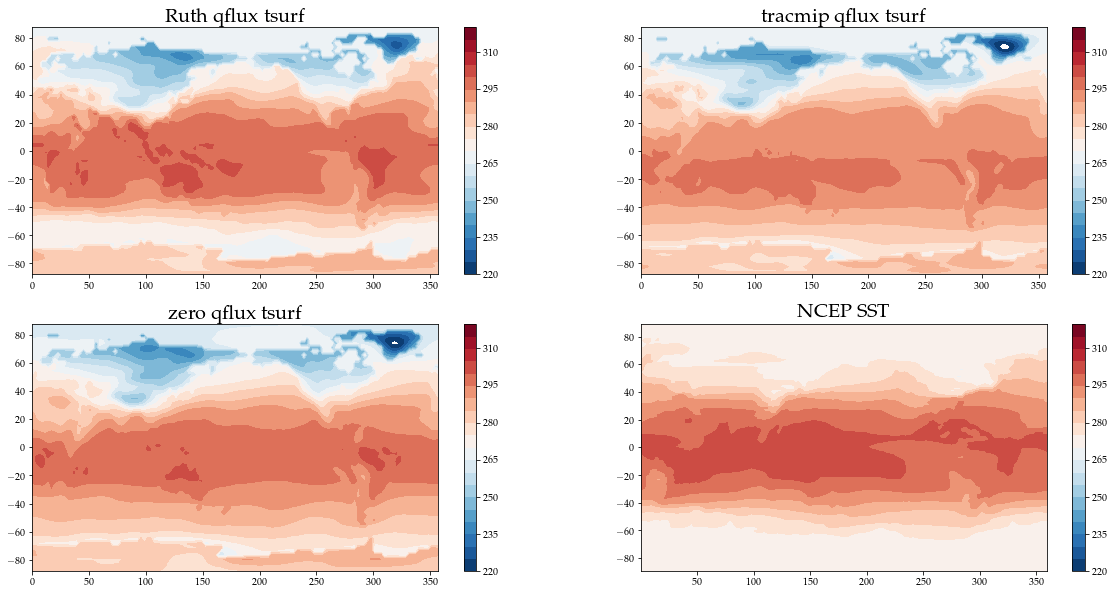

In [12]:
m=0
py.figure(figsize=(20, 10))
py.subplot(221)
cont(lon,lat,tsurf_ruth1[m,:,:],"Ruth qflux tsurf")
py.subplot(222)
cont(lon,lat,tsurf_tracmip1[m,:,:],"tracmip qflux tsurf")
py.subplot(223)
cont(lon,lat,tsurf_zero1[m,:,:],"zero qflux tsurf")
py.subplot(224)
cont(lono,lato,tsurf_obs1[m,:,:],"NCEP SST")

In [13]:
def contmean(x,y,T,title):
    vv=np.arange(220,321,5)
    py.contourf(x,y,T.mean(axis=0),vv, cmap=my_cmap_r);
    py.title(title,fontsize=20)
    py.colorbar()
#     c=py.contour(x,y,T,vv, colors='k',linewidths=0.5);
#     py.clabel(c,  inline=1,fmt = '%1.0f',inline_spacing=40, fontsize=15)
    

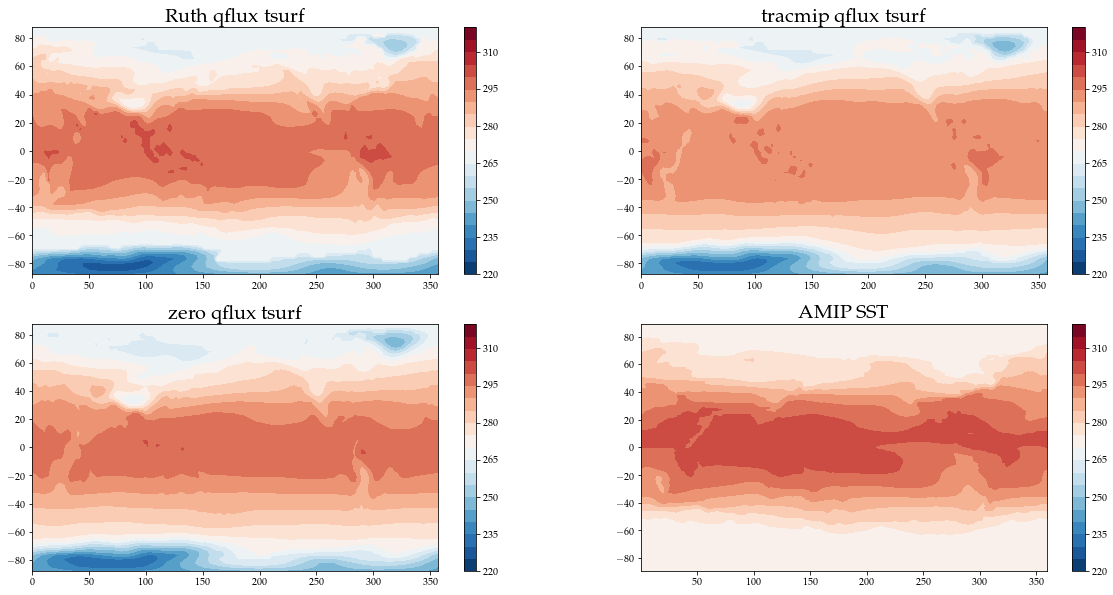

In [14]:
py.figure(figsize=(20, 10))
py.subplot(221)
contmean(lon,lat,tsurf_ruth1[:,:,:],"Ruth qflux tsurf")
py.subplot(222)
contmean(lon,lat,tsurf_tracmip1[:,:,:],"tracmip qflux tsurf")
py.subplot(223)
contmean(lon,lat,tsurf_zero1[:,:,:],"zero qflux tsurf")
py.subplot(224)
contmean(lono,lato,tsurf_obs1[:,:,:],"AMIP SST")

In [83]:
m=0
tsurf_ruth1[m,:,:].shape

(64, 128)